Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat (Links to an external site.)Links to an external site.

dat file - airq402.datView in a new window

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt (Links to an external site.)Links to an external site.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data file
df = pd.read_table('airq402.dat.txt')

In [3]:
df.head()

,CAK ATL 114.47 528 424.56 FL 70.19 111.03 FL 70.19 111.03
0,CAK MCO 122.47 860 276.84 FL 75.10 ...
1,ALB ATL 214.42 852 215.76 DL 78.89 ...
2,ALB BWI 69.40 288 606.84 WN 96.97 ...
3,ALB ORD 158.13 723 313.04 UA 39.79 ...
4,ALB FLL 135.17 1204 199.02 WN 40.68 ...


- After loading the data file, we can see that there are no headers mentioned in data file, lets add the headers

In [4]:
headers = ['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline',
           'market share','Average fare','Low price airline','market share','price']

In [5]:
df = pd.read_table('airq402.dat.txt',names=headers,delim_whitespace=True)

- After adding the headers, lets check few sample records from the dataset to get a brief overview of the data

In [7]:
df.sample(10)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
69,ATL,MCO,137.90,403,1434.34,DL,60.98,147.26,FL,37.88,122.39
412,DFW,PHL,226.96,1302,1006.30,AA,56.41,236.31,US,26.33,211.76
715,LAX,ORF,197.65,2371,226.73,DL,28.71,201.85,AA,22.62,171.17
241,CLT,ORD,137.63,599,854.78,US,33.03,146.37,TZ,29.33,93.67
386,DFW,HRL,122.55,461,322.17,WN,98.00,122.07,WN,98.00,122.07
758,MIA,RDU,141.97,700,287.17,AA,76.76,141.07,AA,76.76,141.07
413,DFW,PHX,193.73,879,1091.95,AA,51.27,197.86,HP,33.34,188.28
916,PHX,SJC,109.13,621,1148.91,WN,50.23,108.14,AA,12.10,101.76
521,FLL,LAX,187.61,2342,953.91,AA,51.45,186.16,DL,18.89,180.64
376,CMH,SEA,157.29,2017,183.58,NW,26.46,150.10,AA,17.93,145.36


- From above few samples, we can see that headers are now correctly added to the data.
- 'Average Fare' is the Dependent Variable here and Rest of the columns are being treated as Independent Variable.

In [9]:
df.describe()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [11]:
df.shape

(1000, 11)

- Here we can see that, there are 1000 records present while there are no missing values present in any of the columns.
- There are 4 categorical variables present for city names while rest are continuous numerical variables.

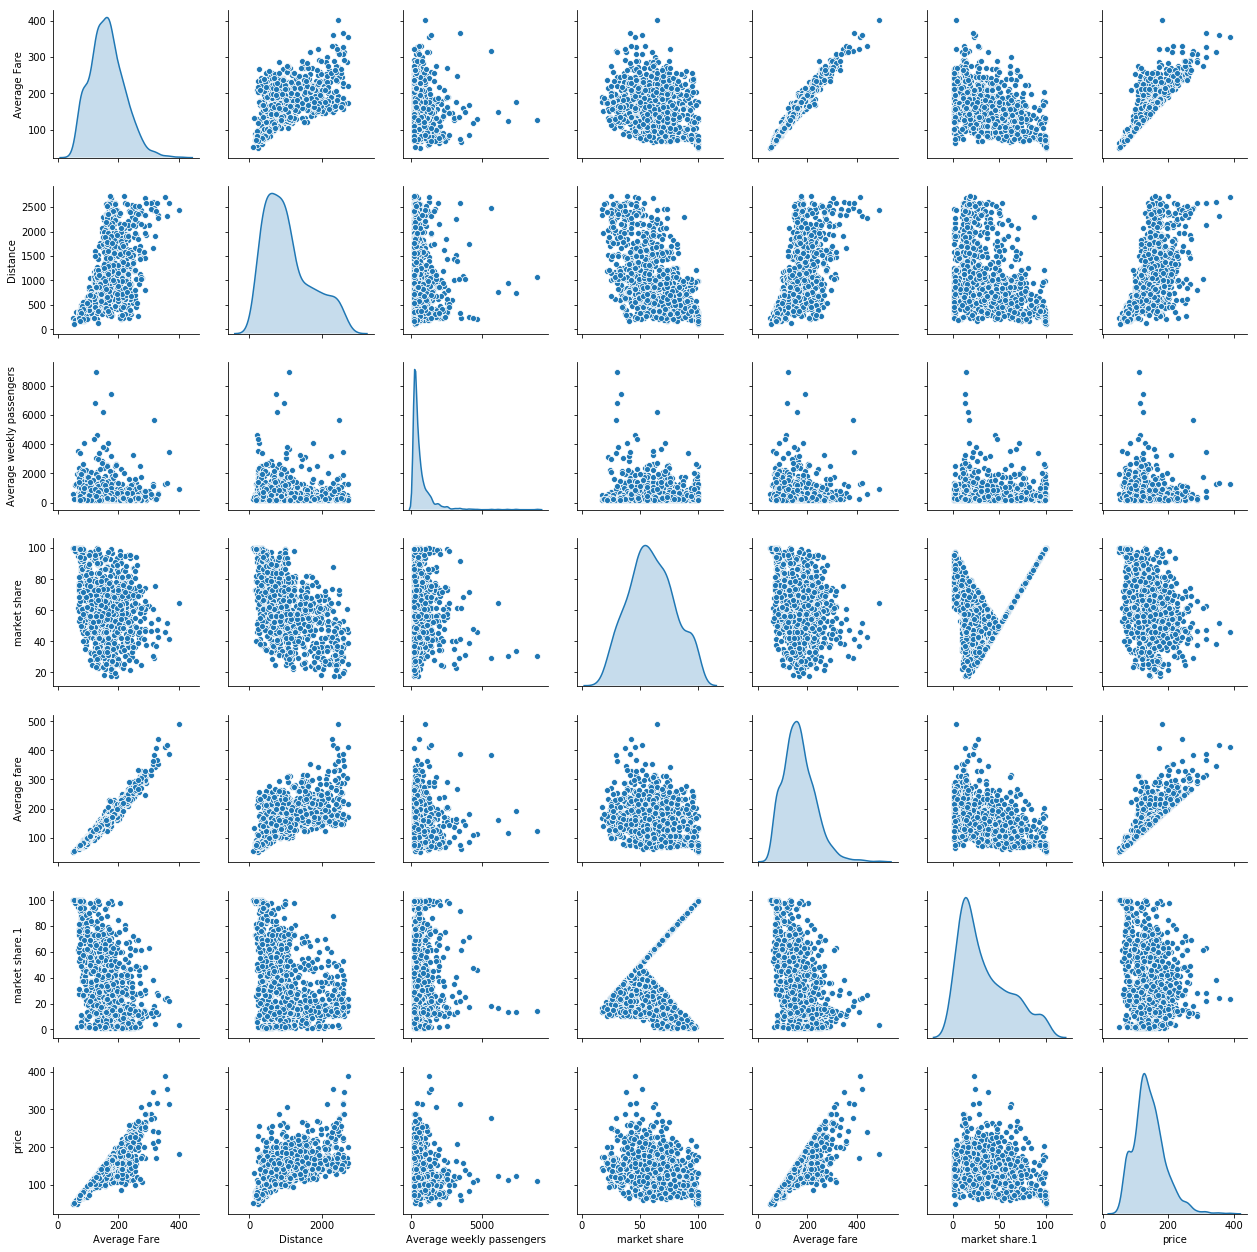

In [13]:
sns.pairplot(df,diag_kind='kde')
plt.show()

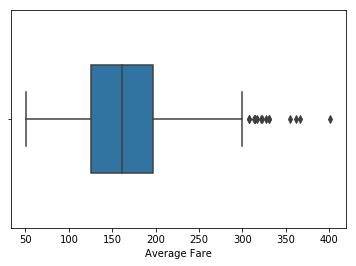

In [14]:
sns.boxplot(x="Average Fare", data=df,width = 0.5)
# So there are a few outliers in Average Fare

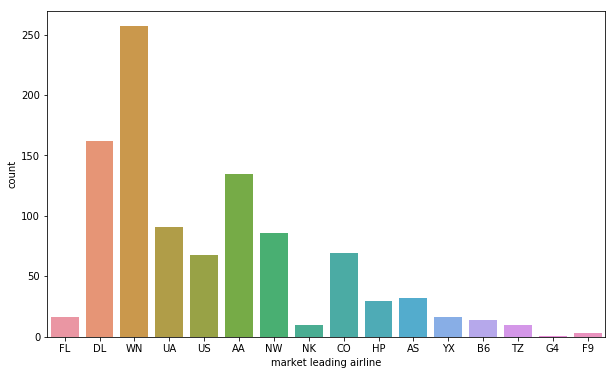

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['market leading airline'])
plt.show()

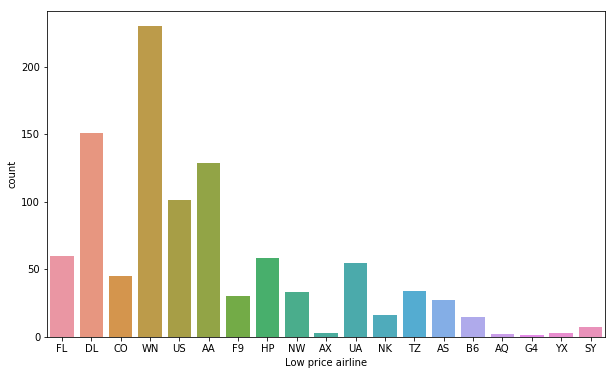

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df['Low price airline'])
plt.show()

In [20]:
df.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share',
       'Average fare', 'Low price airline', 'market share.1', 'price'],
      dtype='object')

In [22]:
# Creating a separate Dataframe for numerical variables
num_df = df[["Average Fare", "Distance", "Average weekly passengers", "market share", "Average fare", "market share.1", "price"]]

# Lets Compute IQR for each column in DataFrame
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

In [23]:
# Finding out Lower and Upper Whisker for each column in DataFrame
lower_whisk = (Q1 - 1.5 * IQR)
upper_whisk = (Q3 + 1.5 * IQR)

In [24]:
# Filtering out Records outside lower_whisker and upper_whisker
num_df = num_df[((num_df >= lower_whisk) & (num_df <= upper_whisk)).all(axis=1)]
num_df.describe()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,160.292068,1039.383051,499.132644,60.636938,162.589051,34.373028,140.431073
std,48.468895,615.224361,327.573566,19.361447,53.288002,27.183305,39.849789
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,50.520000
25%,126.600000,564.000000,249.020000,47.020000,125.590000,13.060000,115.110000
50%,160.710000,914.000000,372.930000,59.750000,160.740000,26.250000,138.020000
75%,194.050000,1381.000000,644.560000,74.660000,198.470000,52.930000,166.260000
max,288.580000,2724.000000,1519.890000,100.000000,315.860000,100.000000,250.020000


In [27]:
X = num_df.iloc[:,1:7]
y = num_df.iloc[:,0]

In [28]:
print(num_df.corr()["Average Fare"] > 0.1)

Average Fare                  True
Distance                      True
Average weekly passengers    False
market share                 False
Average fare                  True
market share.1               False
price                         True
Name: Average Fare, dtype: bool


In [31]:
# Distance, Average fare and price have correlation greater than 0.1
X = X.drop(columns=['Average weekly passengers', 'market share', 'market share.1'])
X.head()

,Distance,Average fare,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42


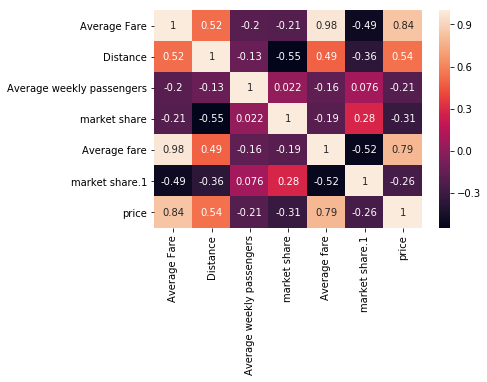

In [32]:
sns.heatmap(num_df.corr(), annot=True)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred = lm.predict(X_test)

In [38]:
y_pred_s = pd.Series(y_pred, index = y_test.keys())

df_act_pred = pd.DataFrame()
df_act_pred["Actual"] = y_test
df_act_pred["Predicted"] = y_pred_s
df_act_pred.head()

,Actual,Predicted
148,177.45,184.595352
785,205.13,205.715808
690,70.48,74.804375
742,137.34,129.336364
800,133.44,135.285251


In [39]:
print("Intercept = ", lm.intercept_)
print("Coefficients = ", lm.coef_)

Intercept =  5.692544695685626
Coefficients =  [0.00230362 0.75706513 0.20732975]


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
print("Train Score (R2) = ", lm.score(X_train, y_train))
print("Test  Score (R2) = ", lm.score(X_test, y_test))

Train Score (R2) =  0.9709209029424284
Test  Score (R2) =  0.9708656459526279


In [42]:
print('Mean squared error(MSE) = ',mean_squared_error(y_test,y_pred))

Mean squared error(MSE) =  68.60439338682954
